In [1]:
import numpy as np
import imageio
import Grayscale
import matplotlib.pyplot as plt
import ImageView


def konverter(file):
    orig_im=imageio.imread(file)
    gray_im=Grayscale.grayscale(file)
    u0=np.copy(gray_im)
    orig_im=orig_im.astype(float)/255

    dudx=np.zeros(gray_im.shape)
    dudy=np.zeros(gray_im.shape)
    dudx[1:-1, 1:-1]=u0[2:, 1:-1]-u0[1:-1, 1:-1]
    dudy[1:-1, 1:-1]=u0[1:-1, 2:]-u0[1:-1, 1:-1]
    gradient=dudx+dudy
    g=abs(gradient)/np.sqrt(3)
    retning=gradient*(orig_im[:,:,0] + orig_im[:,:,1] + orig_im[:,:,2])

    alpha=0.25
    for i in range(2):
        laplace = (u0[0:-2, 1:-1] +
                   u0[2:, 1:-1] +
                   u0[1:-1, 0:-2] +
                   u0[1:-1, 2:] -
                   4 * u0[1:-1, 1:-1])
        u0[1:-1, 1:-1] += alpha * laplace - retning[1:-1, 1:-1]*g[1:-1, 1:-1]
        u0[:, 0] = u0[:, 1]      # Neumann randbetingelser
        u0[:, -1] = u0[:, -2]    
        u0[0, :] = u0[1, :]      
        u0[-1, :] = u0[-2 , :]   
        u0[u0 < 0] = 0
        u0[u0 > 1] = 1
    ImageView.singleView(orig_im, "original", True)
    ImageView.singleView(gray_im, "ordinær metode", True)
    ImageView.singleView(u0, "sofistikert metode", True)



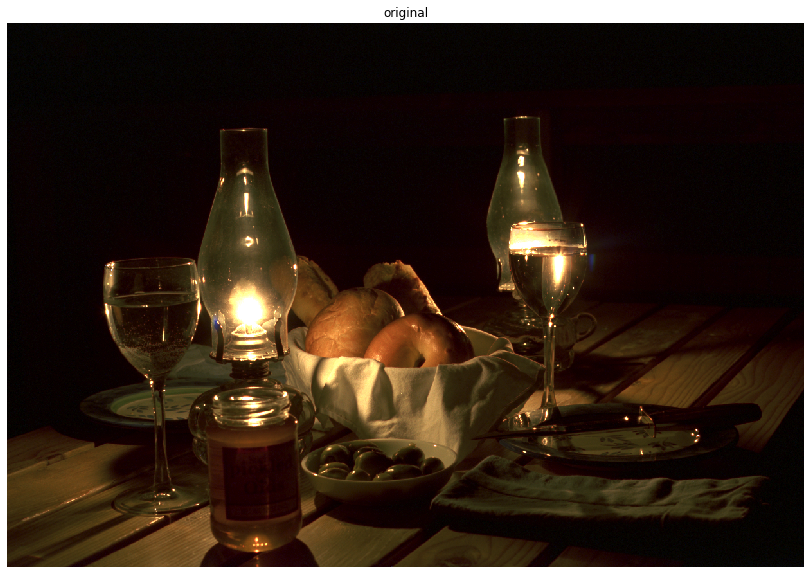

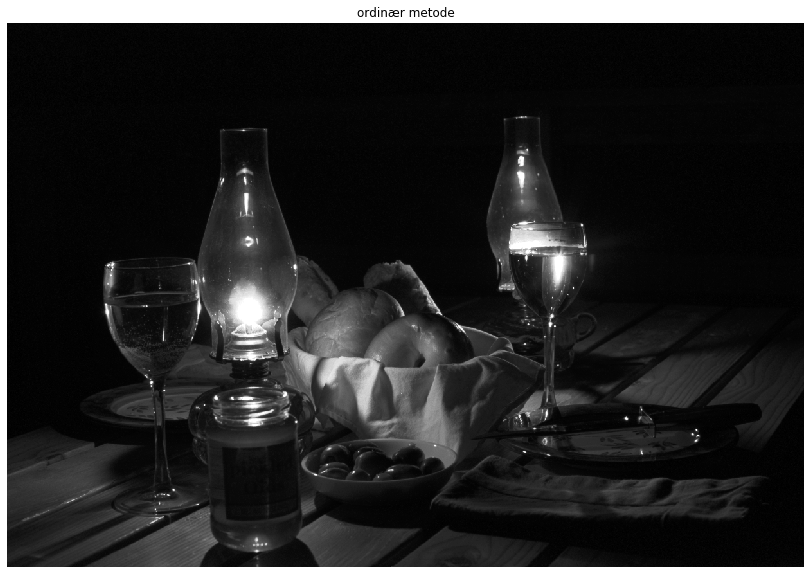

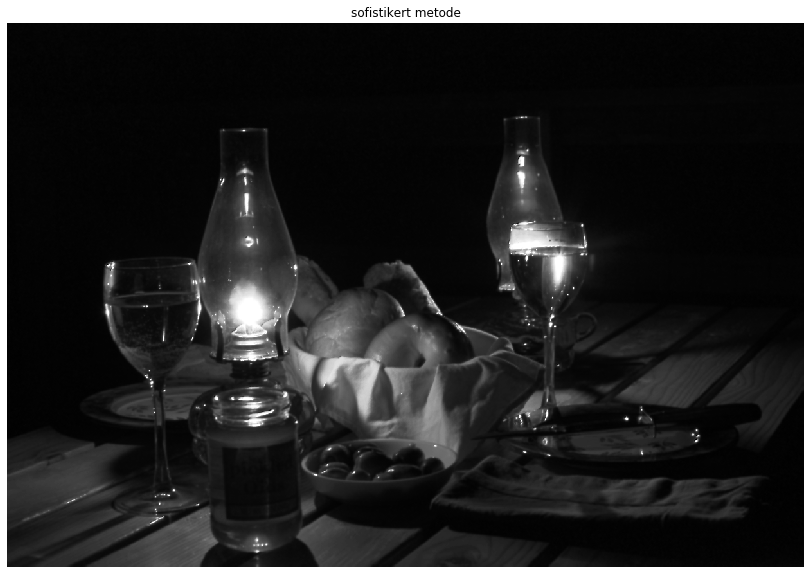

In [2]:
file='../hdr-bilder/StillLife/StillLife_01024.png' #leser inn bilder
konverter(file)